In [14]:
import pandas as pd

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')  

# 1. Summary statistics for numeric columns
numeric_summary = df.describe()
print("🔹 Summary Statistics for Numeric Columns:")
print(numeric_summary)

# 2. Count of Mono vs Dual types
type_count_distribution = df['type_count'].value_counts()
print("\n🔹 Distribution of Type Count (Mono vs Dual):")
print(type_count_distribution)

# 3. Top 10 most common type combinations
top_type_combinations = df['type_clean'].value_counts().head(10)
print("\n🔹 Top 10 Most Common Type Combinations:")
print(top_type_combinations)

# 4. Check for missing values in each column
missing_values = df.isnull().sum()
print("\n🔹 Missing Values per Column:")
print(missing_values)

# 5. Count unique evolution sets
unique_evo_sets = df['evo_set'].nunique()
print(f"\n🔹 Number of Unique Evolution Sets: {unique_evo_sets}")


🔹 Summary Statistics for Numeric Columns:
                id       height       weight           hp       attack  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean    513.000000    12.116098   669.865366    70.184390    77.521951   
std     296.036315    12.481673  1212.731138    26.631054    29.782541   
min       1.000000     1.000000     1.000000     1.000000     5.000000   
25%     257.000000     5.000000    85.000000    50.000000    55.000000   
50%     513.000000    10.000000   280.000000    68.000000    75.000000   
75%     769.000000    15.000000   700.000000    85.000000   100.000000   
max    1025.000000   200.000000  9999.000000   255.000000   181.000000   

           defense     s_attack    s_defense        speed      evo_set  
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000  
mean     72.507317    70.080976    70.205854    67.186341   253.195122  
std      29.286972    29.658378    26.639329    28.717227   159.505305  

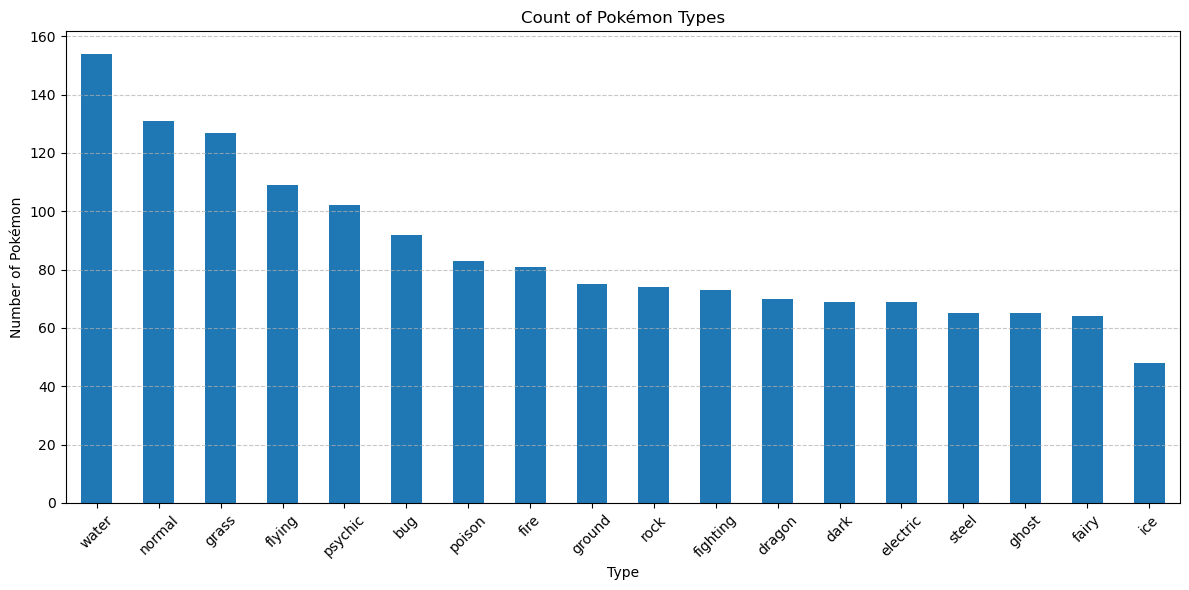

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')

# Split type_clean into individual types and explode to long format
df_types = df['type_clean'].str.split(',', expand=False).explode()

# Count occurrences of each type
type_counts = df_types.value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Count of Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


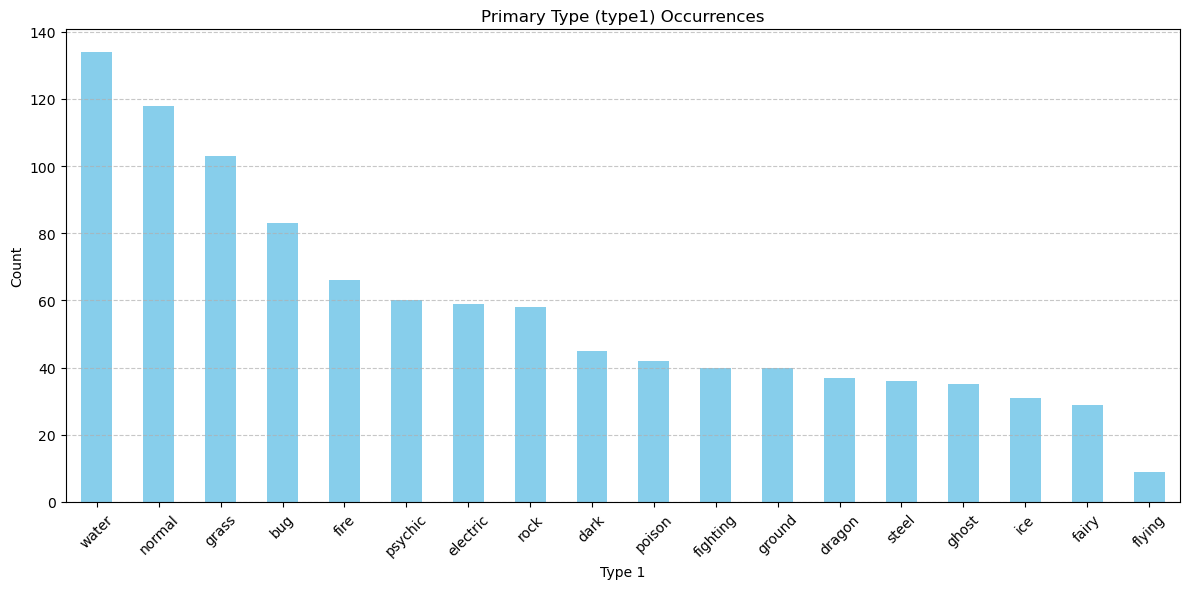

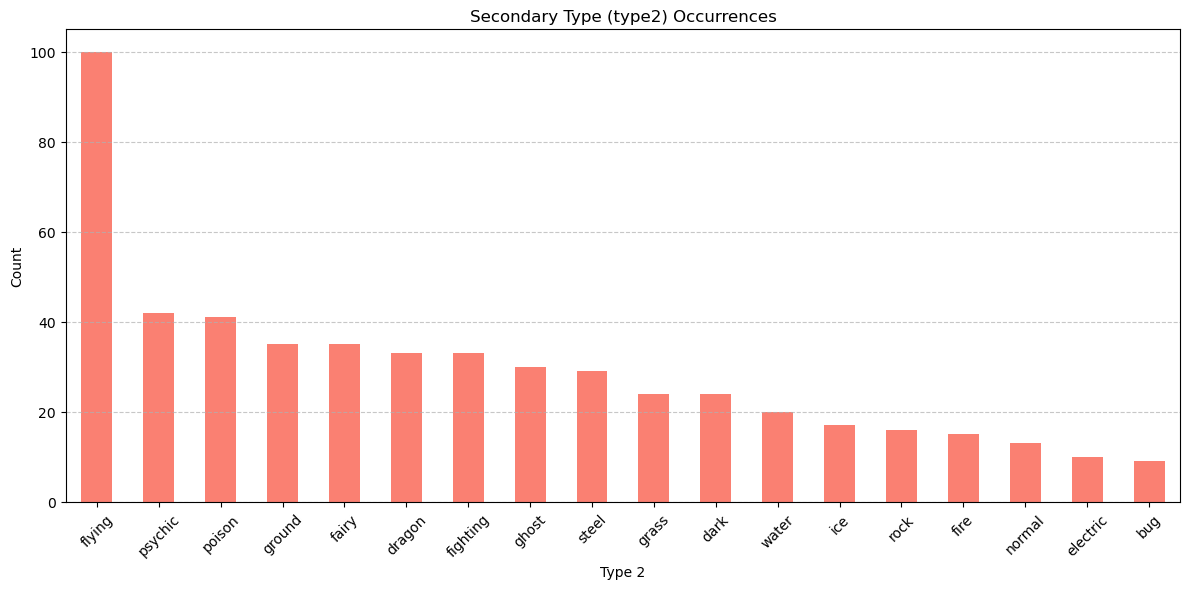

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')

# Split type_clean into type1 and type2
df[['type1', 'type2']] = df['type_clean'].str.split(',', n=1, expand=True)

# Count occurrences of type1
type1_counts = df['type1'].value_counts()

# Plot type1 bar chart
plt.figure(figsize=(12, 6))
type1_counts.plot(kind='bar', color='skyblue')
plt.title('Primary Type (type1) Occurrences')
plt.xlabel('Type 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Drop missing type2 values (for Mono types)
type2_counts = df['type2'].dropna().value_counts()

# Plot type2 bar chart
plt.figure(figsize=(12, 6))
type2_counts.plot(kind='bar', color='salmon')
plt.title('Secondary Type (type2) Occurrences')
plt.xlabel('Type 2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/v8/m8d3fcvx1m5949l8bch0_qq80000gn/T/ipykernel_36441/792596121.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dual_types_df['type_combo'] = dual_types_df.apply(


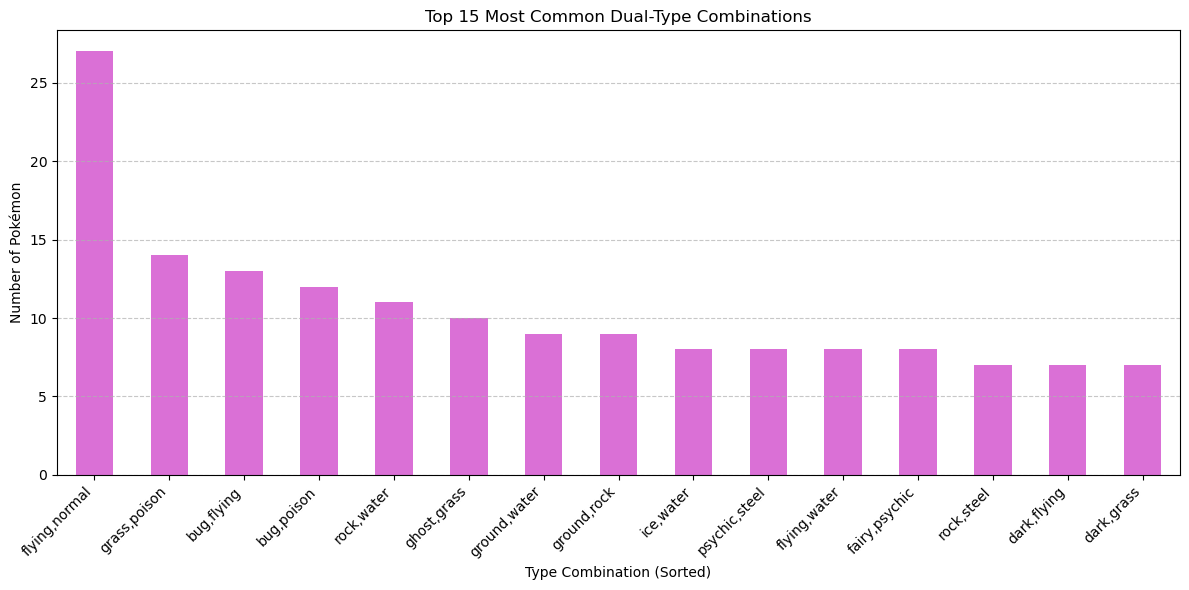

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')

# Split type_clean into type1 and type2
df[['type1', 'type2']] = df['type_clean'].str.split(',', n=1, expand=True)

# Filter only dual types (where type2 is not null)
dual_types_df = df[df['type2'].notnull()]

# Reconstruct normalized type combination strings (sorted alphabetically to treat fire,flying = flying,fire)
dual_types_df['type_combo'] = dual_types_df.apply(
    lambda row: ",".join(sorted([row['type1'], row['type2']])),
    axis=1
)

# Count and plot top dual-type combinations
type_combo_counts = dual_types_df['type_combo'].value_counts()

plt.figure(figsize=(12, 6))
type_combo_counts.head(15).plot(kind='bar', color='orchid')
plt.title('Top 15 Most Common Dual-Type Combinations')
plt.xlabel('Type Combination (Sorted)')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


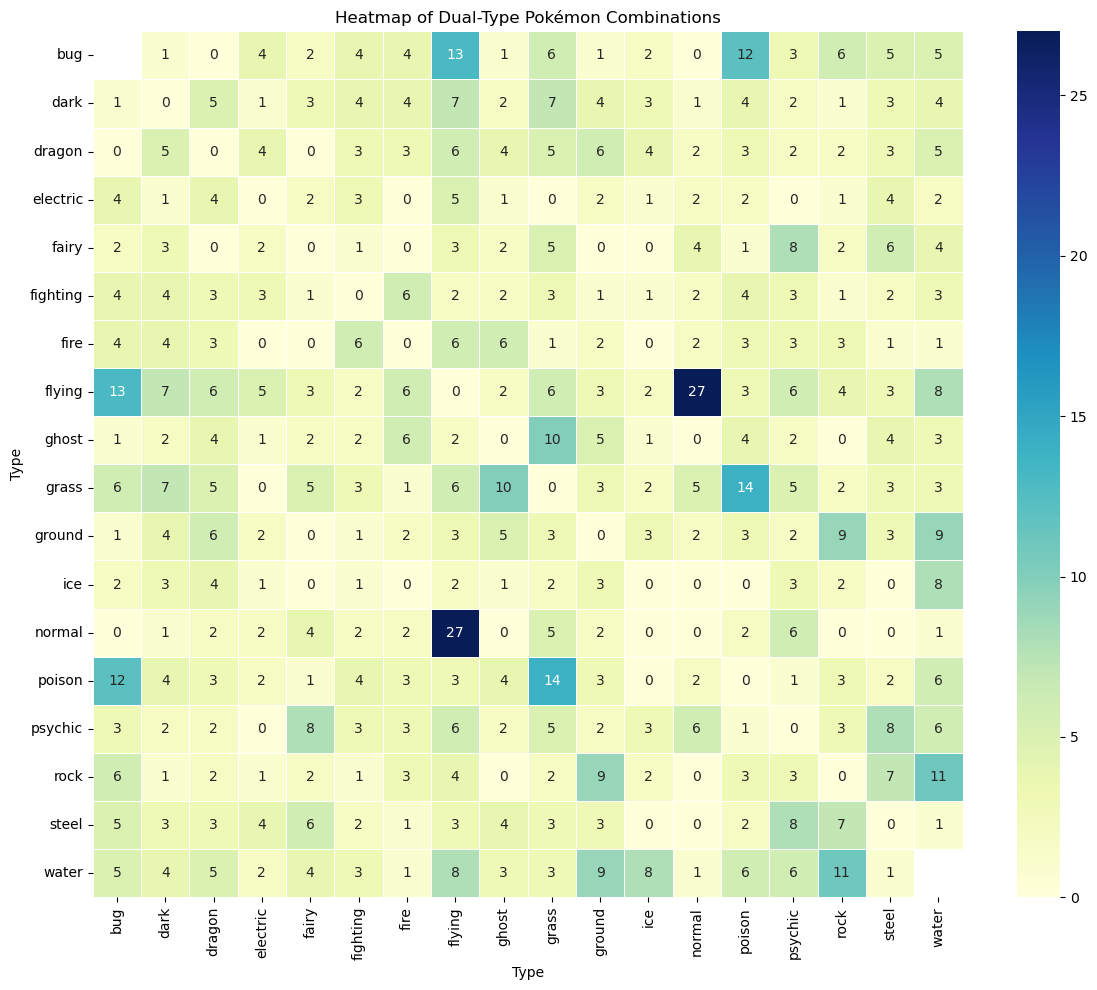

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('../pokedex_with_type_count.csv')

# Split type_clean into type1 and type2
df[['type1', 'type2']] = df['type_clean'].str.split(',', n=1, expand=True)

# Filter only dual-type Pokémon
dual_df = df[df['type2'].notnull()].copy()

# Normalize combinations so fire,flying == flying,fire
dual_df['type1_norm'], dual_df['type2_norm'] = zip(*dual_df.apply(
    lambda row: sorted([row['type1'], row['type2']]), axis=1
))

# Create crosstab matrix of type1 vs type2
combo_matrix = pd.crosstab(dual_df['type1_norm'], dual_df['type2_norm'])

# Fill symmetric pairs to reflect true counts
combo_matrix = combo_matrix.add(combo_matrix.T, fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(combo_matrix, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Dual-Type Pokémon Combinations')
plt.xlabel('Type')
plt.ylabel('Type')
plt.tight_layout()
plt.show()
